**Importing libraries**

pandas : For handeling csv dataset
numpy : Support for Pandas and calculations
Matplotlib : For visualization (Plotting graphs)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

**Loading and Visualizing Dataset**

About Dataset
MNIST dataset has the following features:

    Dataset size 70,000 samples of handwritten images.
    The size of each image is 28x28 pixels.
    Each image has only 1 color channel, i.e., grayscale image.
    Each pixel has value in the range of [0,255] where 0 represents black, and 255 represents white.
    Each image has labeled from 0-9.

Loading train.csv
This will loads dataset train.csv into a Dataframe using Pandas. Then using NumPy for random permutation of the training dataset. Seed is used to regenerate the same permutation every time.

In [2]:
np.random.seed(1) 
df_train = pd.read_csv("~/practice/digit-3.8/train.csv") #loading dataset 
df_train = df_train.iloc[np.random.permutation(len(df_train))]

In [3]:
df_train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29633,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36369,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16624,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14389,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(42000, 785)

Training set has 42,000 images. And has 785 columns, 1st coloumn is label for the image and rest 784 are the pixel values.
As it is flattened, it will be reshaped later.


**Preparing Training and Validation data**

It requires a few steps:

    Assuming the validation set as 10% of the training set.
    Splitting training set into a training set (90% original training set) and validation set (10% original training set) from the training dataset.
    Reshaping both sets into (sample size,28,28,1) where sample size represents the size of the train or validation set.
    Splitting the labels for both training set and validation set.

Using df.iloc of pandas for slicing the data frame, then, converting into NumPy array and finally reshaping NumPy array in required shape.

In [5]:
sample_size = df_train.shape[0] # Training set size
validation_size = int(df_train.shape[0]*0.1) # Validation set size 

# train_x and train_y
train_x = np.asarray(df_train.iloc[:sample_size-validation_size,1:]).reshape([sample_size-validation_size,28,28,1]) # taking all columns expect column 0
train_y = np.asarray(df_train.iloc[:sample_size-validation_size,0]).reshape([sample_size-validation_size,1]) # taking column 0

# val_x and val_y
val_x = np.asarray(df_train.iloc[sample_size-validation_size:,1:]).reshape([validation_size,28,28,1])
val_y = np.asarray(df_train.iloc[sample_size-validation_size:,0]).reshape([validation_size,1])

Shape of training set

In [6]:
train_x.shape,train_y.shape

((37800, 28, 28, 1), (37800, 1))

Loading test.csv

test.csv is loading using Pandas. It has 28,000 images and no label is there. Prediction need to be done on these images. After loading, the data is converted to a numpy array and it is reshaped.

In [7]:
df_test = pd.read_csv("~/practice/digit-3.8/test.csv")
test_x = np.asarray(df_test.iloc[:,:]).reshape([-1,28,28,1])

Normalize Pixel Data

Each pixel values lies between [0,255]. This value range is too high and it will be difficult for any model to learn. The best approach is normalize the data. In this case, as the pixel value is in the known range it sufficient to scale the pixel values in range [0,1] by simply dividing the array by 255.

In [8]:
# converting pixel values in range [0,1]
train_x = train_x/255
val_x = val_x/255
test_x = test_x/255

The frequency of classes in the dataset is checked to ensure the balance in the dataset. 

**Frequency plot for the training set**

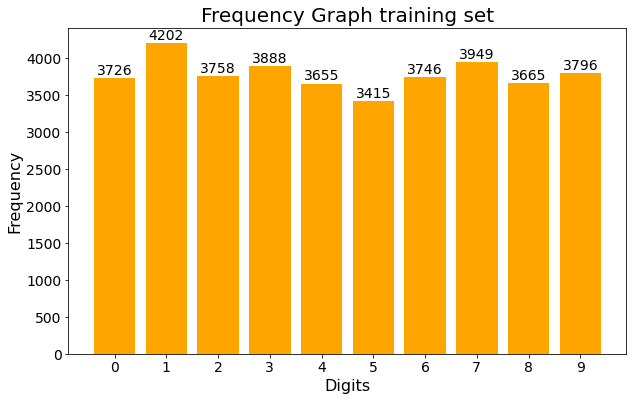

In [9]:
# Checking frequency of digits in training and validation set
counts = df_train.iloc[:sample_size-validation_size,:].groupby('label')['label'].count()

f = plt.figure(figsize=(10,6))
f.add_subplot(111)

plt.bar(counts.index,counts.values,width = 0.8,color="orange")
for i in counts.index:
    plt.text(i,counts.values[i]+50,str(counts.values[i]),horizontalalignment='center',fontsize=14)

plt.tick_params(labelsize = 14)
plt.xticks(counts.index)
plt.xlabel("Digits",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("Frequency Graph training set",fontsize=20)
plt.savefig('digit_frequency_train.png')  
plt.show()

**Frequency plot for the validation set**

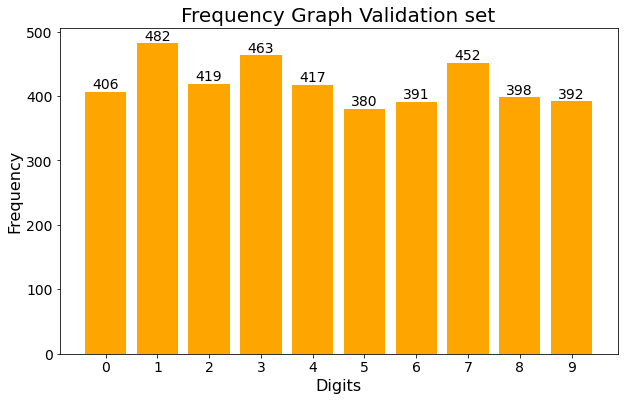

In [10]:
# Checking frequency of digits in training and validation set
counts = df_train.iloc[sample_size-validation_size:,:].groupby('label')['label'].count()

f = plt.figure(figsize=(10,6))
f.add_subplot(111)

plt.bar(counts.index,counts.values,width = 0.8,color="orange")
for i in counts.index:
    plt.text(i,counts.values[i]+5,str(counts.values[i]),horizontalalignment='center',fontsize=14)

plt.tick_params(labelsize = 14)
plt.xticks(counts.index)
plt.xlabel("Digits",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("Frequency Graph Validation set",fontsize=20)
plt.savefig('digit_frequency_val.png')
plt.show()

It seems that both the training and validation set have a good balance between the classes.

**Visualizing the digits by plotting Images**

Plotting the first 30 images of digits with the label.

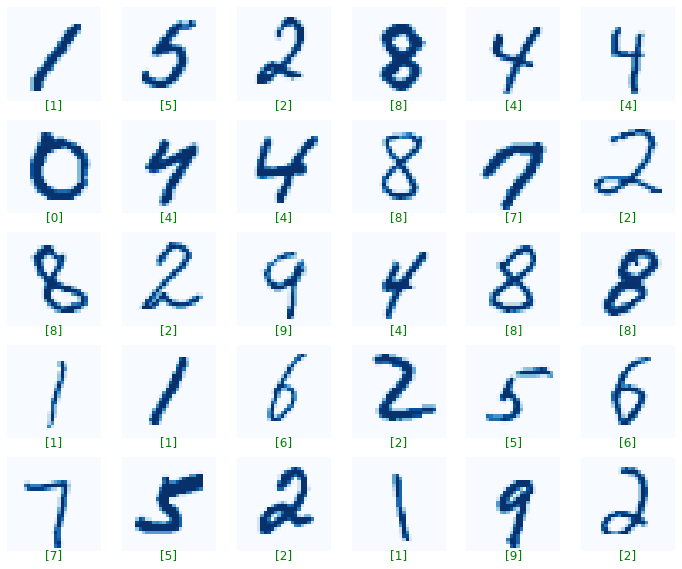

In [11]:
rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(train_x[i].reshape([28,28]),cmap="Blues") 
    plt.axis("off")
    plt.title(str(train_y[i]), y=-0.15,color="green")
plt.savefig("digits.png")